<a href="https://colab.research.google.com/github/kithmiGunawardna/Hate_Speech_detection/blob/master/Hate_Speech_Detection_imbalanced_dataset_classical_ML_approches_BOW(bi_gram)fine_Tuning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import relevant libraraies
import pandas as pd
import numpy as np
from google.colab import drive
import re
import nltk
nltk.download('stopwords')
nltk.download('snowball_data')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package snowball_data to /root/nltk_data...
[nltk_data]   Package snowball_data is already up-to-date!


 0 - hate speech 1 - offensive language 2 - neither

In [ ]:
#import dataset
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Campus_Research/labeled_data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#df['tweet'] = df['tweet'].str.lower()  #convert tweets to lowerclass letters

In [ ]:
# # removing the users from the tweets
# import re
# import re

# # Assuming df['tweet'] is a Pandas Series
# df['tweet'] = df['tweet'].apply(lambda x: re.sub('@[^\s]+', '', str(x)))




In [ ]:
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [ ]:
# import nltk

# from nltk.stem import PorterStemmer

# nltk.download('stopwords')

# from nltk.corpus import stopwords

In [ ]:
# stop_words = set(stopwords.words('english')) #to avoid similer ones we put thrm in to a set
# stemmer = PorterStemmer()

# def preprocess_text(text):
#     words = [stemmer.stem(word) for word in text.split() if not word.lower() in stop_words]
#     return ' '.join(words)

# df['processed_text'] = df['tweet'].apply(preprocess_text)

In [ ]:
# pattern = r'[^\w\s]'
# df['processed_text'] =df['processed_text'].replace(pattern, '', regex=True)

In [ ]:
#create a function to clean the data set witch includeremove sepecial charaters , puctuations,removing stopwords

# Initialize stemmer and stop words
stemmer = SnowballStemmer("english")
stopword = set(stopwords.words('english'))



# Initialize stemmer and stop words
def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)

    # Split text into words after removing stopwords
    words = [word for word in text.split(' ') if word not in stopword]

    # Apply stemming to each word
    stemmed_words = [stemmer.stem(word) for word in words]

    # Join stemmed words back into text
    cleaned_text = " ".join(stemmed_words)

    return cleaned_text





In [ ]:
# Apply clean_text function
df.loc[:, 'tweet'] = df['tweet'].apply(clean_text)

In [ ]:
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,rt mayasolov woman shouldnt complain clean ho...
1,1,3,0,3,0,1,rt boy dat coldtyga dwn bad cuffin dat hoe ...
2,2,3,0,3,0,1,rt urkindofbrand dawg rt ever fuck bitch sta...
3,3,3,0,2,1,1,rt cganderson vivabas look like tranni
4,4,6,0,6,0,1,rt shenikarobert shit hear might true might f...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,yous muthafin lie coreyemanuel right tl tras...
24779,25292,3,0,1,2,2,youv gone broke wrong heart babi drove redneck...
24780,25294,3,0,3,0,1,young buck wanna eat dat nigguh like aint fuck...
24781,25295,6,0,6,0,1,youu got wild bitch tellin lie


In [ ]:
df1 =df[['class', 'tweet']]
df1


,class,tweet
0,2,rt mayasolov woman shouldnt complain clean ho...
1,1,rt boy dat coldtyga dwn bad cuffin dat hoe ...
2,1,rt urkindofbrand dawg rt ever fuck bitch sta...
3,1,rt cganderson vivabas look like tranni
4,1,rt shenikarobert shit hear might true might f...
...,...,...
24778,1,yous muthafin lie coreyemanuel right tl tras...
24779,2,youv gone broke wrong heart babi drove redneck...
24780,1,young buck wanna eat dat nigguh like aint fuck...
24781,1,youu got wild bitch tellin lie


In [ ]:
def addlabels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha='center',
                 bbox=dict(facecolor='red', alpha=0.8))


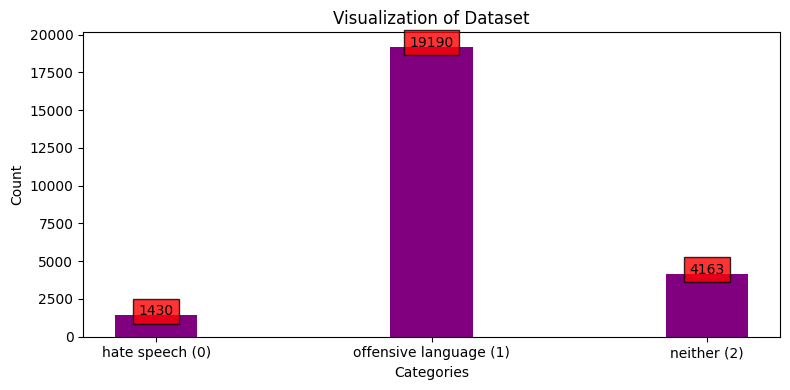

In [ ]:
category = ['hate speech (0)', 'offensive language (1)', 'neither (2)']
count = df['class'].value_counts()
value_count = [count[0], count[1], count[2]]

fig = plt.figure(figsize=(8, 4))  # Adjust the figsize for a smaller graph

plt.bar(category, value_count, color='purple', width=0.3)  # Reduce the width of the bars

addlabels(category, value_count)
plt.xlabel("Categories")
plt.ylabel("Count")
plt.title("Visualization of Dataset")
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()






In [ ]:
y = df['class']
x = df.tweet

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


***using bag of word bi gram method traing the models:***
     



In [ ]:
vectorizer = CountVectorizer(ngram_range=(2, 2))

# Transform training data
x_train_vectorizer = vectorizer.fit_transform(x_train)

# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Transform test data
x_test_vectorizer = vectorizer.transform(x_test)

***SVM model***

In [ ]:
parameters_SVM = {'kernel':('linear', 'rbf','poly','sigmoid'), 'C':[1, 10] ,'gamma':('scale','float','auto')}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters_SVM)
clf.fit(x_train_vectorizer,y_train)



In [ ]:
print(clf.cv_results_)



In [ ]:
df_svc = pd.DataFrame(clf.cv_results_)


In [ ]:
df_svc

In [ ]:
df_svc[['param_C', 'param_kernel', 'params', 'mean_test_score', 'rank_test_score']]


In [ ]:
print(clf.best_params_)
print(clf.best_estimator_)

In [ ]:
SVM_output = clf.predict(x_test_vectorizer)

In [ ]:
y_true = y_test
y_pred = SVM_output
cm_for_SVM = confusion_matrix(y_true, y_pred)
sn.heatmap(data=cm_for_SVM, annot=True)


In [ ]:
print(classification_report(y_true, y_pred ,labels=[0,1,2]))

***Logistic Regression model***  

In [ ]:
parameters_Logistic_regression = {'solver':('lbfgs', 'liblinear','newton-cg') ,'C':[1.0,10.0],'penalty':('l1','l2','elasticnet')}
Logistic_Regression = LogisticRegression()
model = GridSearchCV(Logistic_Regression,parameters_Logistic_regression)
model.fit(x_train_vectorizer,y_train)


In [ ]:
print(model.cv_results_)

In [ ]:
df_logistic_regression = pd.DataFrame(model.cv_results_)

In [ ]:
df_logistic_regression

In [ ]:
df_logistic_regression[['param_C'	,'param_penalty'	,'param_solver', 'params', 'mean_test_score', 'rank_test_score']]

In [ ]:
print(model.best_params_)
print(model.best_estimator_)

In [ ]:
logisticregresision_output = model.predict(x_test_vectorizer)


In [ ]:
y_true = y_test
y_pred = logisticregresision_output
cm_for_LogisticRegression = confusion_matrix(y_true, y_pred)
sn.heatmap(data=cm_for_LogisticRegression, annot=True)


In [ ]:
print(classification_report(y_true, logisticregresision_output,labels=[0,1,2]))

***Decision Tree Classifier***

In [ ]:
parameters_decision_tree_classifier = {'criterion':('gini', 'entropy','log_loss'), 'splitter':('best','random') ,'max_features':('sqrt','log2'),'max_depth' : [3,2,100,1000,10000],'min_samples_split':[2,20,30,40],'random_state':[0,42,123]}
Dession_tree_classifiar= DecisionTreeClassifier()
clf = GridSearchCV(Dession_tree_classifiar,parameters_decision_tree_classifier )
clf.fit(x_train_vectorizer,y_train)


In [ ]:
print(clf.cv_results_)

In [ ]:
df_dicision_tree = pd.DataFrame(clf.cv_results_)


In [ ]:
df_dicision_tree

In [ ]:
df_dicision_tree[['param_criterion', 'param_max_depth','param_max_features','param_min_samples_split','param_splitter', 'params', 'mean_test_score', 'rank_test_score']]

In [ ]:
print(clf.best_params_)
print(clf.best_estimator_)

In [ ]:
decision_tree_output = clf.predict(x_test_vectorizer)

In [ ]:
y_true = y_test
y_pred =decision_tree_output
cm_for_decision_tree = confusion_matrix(y_true, y_pred)
sn.heatmap(data=cm_for_decision_tree, annot=True)

In [ ]:
print(classification_report(y_true, y_pred ,labels=[0,1,2]))

***passive Aggressive***

In [ ]:
parameters_passive_aggrasive ={'C':[1.0,10.0],'max_iter':[10,100,1000],'early_stopping':(True,False),'shuffle':(True,False),'loss':('str','hinge'),'n_jobs':[1,10,100,1000],'random_state':[0,42,123]}
passive_aggrasive = PassiveAggressiveClassifier()
clf = GridSearchCV(passive_aggrasive,parameters_passive_aggrasive )
clf.fit(x_train_vectorizer,y_train)

In [ ]:
print(clf.cv_results_)

In [ ]:
df_passive_aggrasive = pd.DataFrame(clf.cv_results_)


In [ ]:
df_passive_aggrasive

In [ ]:
df_passive_aggrasive[['param_C', 'param_early_stopping','param_loss','param_max_iter','param_n_jobs','param_random_state'	,'param_shuffle', 'params', 'mean_test_score', 'rank_test_score']]

In [ ]:
print(clf.best_params_)
print(clf.best_estimator_)

In [ ]:
passive_aggressive_output = clf.predict(x_test_vectorizer)

In [ ]:
y_true = y_test
y_pred = passive_aggressive_output
cm_for_passive_aggressive_output = confusion_matrix(y_true, y_pred)
sn.heatmap(data=cm_for_passive_aggressive_output, annot=True)

In [ ]:
print(classification_report(y_true,passive_aggressive_output,labels=[0,1,2]))

***Naive Bayes***

In [ ]:
parameters_Naive_Bayes ={'alpha':[1.0,10.0,100.0,1000],'fit_prior':(True,False),'class_prior':[[0.2, 0.5,0.9]]}
Naive_Bayes = MultinomialNB()
clf = GridSearchCV(estimator=Naive_Bayes, param_grid=parameters_Naive_Bayes )
# Fit the model using dense data
clf.fit( x_train_vectorizer, y_train)

In [ ]:
print(clf.cv_results_)

In [ ]:
df_navie_bayes = pd.DataFrame(clf.cv_results_)

In [ ]:
df_navie_bayes

In [ ]:
df_navie_bayes[['param_alpha'	,'param_class_prior','param_fit_prior'	, 'params', 'mean_test_score', 'rank_test_score']]

In [ ]:
print(clf.best_params_)
print(clf.best_estimator_)

In [ ]:
naive_bayes_output = clf.predict(x_test_vectorizer)

In [ ]:
y_true = y_test
y_pred = naive_bayes_output
cm_for_naive_bayes_output = confusion_matrix(y_true, y_pred)
sn.heatmap(data=cm_for_naive_bayes_output, annot=True)

In [ ]:
print(classification_report(y_true,naive_bayes_output,labels=[0,1,2]))

***KNN model***

In [ ]:
parameters_KNN = {'n_neighbors' : [2,3,5,10], 'algorithm' : ('auto', 'ball_tree', 'kd_tree', 'brute'), 'leaf_size' : [10,30 ,50], 'p':[1,2,3] ,'n_jobs' : [10,100,1000] }
KNN = KNeighborsClassifier()
neigh =GridSearchCV(KNN , parameters_KNN )
neigh.fit(x_train_vectorizer,y_train)


In [ ]:
print(neigh.cv_results_)

In [ ]:
df_KNN = pd.DataFrame(neigh.cv_results_)

In [ ]:
df_KNN

In [ ]:
df_KNN[['params', 'mean_test_score', 'rank_test_score']]

In [ ]:
print(neigh.best_params_)
print(neigh.best_estimator_)

In [ ]:
KNN_output = neigh.predict(x_test_vectorizer)

In [ ]:
y_true = y_test
y_pred = KNN_output
cm_for_KNN_output = confusion_matrix(y_true, y_pred)
sn.heatmap(data=cm_for_KNN_output, annot=True)

In [ ]:
print(classification_report(y_true,passive_aggressive_output,labels=[0,1,2]))

***Random Forest***

In [ ]:
parameters_Random_forest ={'max_depth': [3,2,10,100,1000], 'random_state' : [0,42,123] ,'n_estimators' :[10,100,1000], 'criterion' : ('gini', 'entropy', 'log_loss') ,'min_samples_split': [2,20,30,40] , 'max_features': ('sqrt','log2',None),'bootstrap':(True,False),'n_jobs':[10,100,1000]}
Random_Forest = RandomForestClassifier()
clf =GridSearchCV(Random_Forest,parameters_Random_forest )
clf.fit(x_train_vectorizer,y_train)

In [ ]:
print(clf.cv_results_)

In [ ]:
df_Random_Forest = pd.DataFrame(clf.cv_results_)

In [ ]:
df_Random_Forest

In [ ]:
df_Random_Forest[['params', 'mean_test_score', 'rank_test_score']]

In [ ]:
print(clf.best_params_)
print(clf.best_estimator_)

In [ ]:
Random_forest_output = clf.predict(x_test_vectorizer)

In [ ]:
y_true = y_test
y_pred =Random_forest_output
cm_for_Random_forest = confusion_matrix(y_true, y_pred)
sn.heatmap(data=cm_for_Random_forest, annot=True)

In [ ]:
print(classification_report(y_true,Random_forest_output,labels=[0,1,2]))